# Méthodes ensemblistes :  arbres de décision, Forest aléatoire, Bagging.

Ce notebook montre comment j'ai choisi de déterminer les paramètres optimaux pour classifier les grains de beauté avec les méthodes d'arbre de décision, de forêts aléatoires et de Bagging. 


Ils regroupent les essais 9, 10, 11, 12 et 13 du challenge Kaggle. 

-essais 9,10 : décision Trees


-essais 11,12 : Random Forest


-essai 13 : Bagging.

Les premières parties détaillent mes choix de paramètre, la dernière partie est le code qui m'a servi pour soummetre mes prédictions en ligne.

On s'attend à ce que les Random Forest fonctionnent mieux que les Décision Trees, car ces derniers sont assez instables.

## Importations et chargement des données.

In [1]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import decomposition
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import GridSearchCV

import imblearn
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()   

In [2]:
df = pd.read_csv('data/train.csv')
X_df = df['ImageId']
y_df = df['Malignant']
names = X_df.values
y = y_df.values

df2 = pd.read_csv('data/features.csv')
features_df = df2.loc[df2['ImageId'].isin(list(names))]
features = np.array(features_df.values)
X = features[:,1:24]# 6 features ont été ajoutée depuis.
class_names = ["healthy","melanoma"]
N, M = X.shape

In [3]:
print('Il y a '+ str(M)+ ' features et ' + str(N) + ' lignes')

Il y a 23 features et 700 lignes


## Prétraitements : 

 On sépare les données que l'on a en un ensemble d'entrainement et un ensemble de test. On normalise les données afin que les features avec des nombres plus importants ne faussent pas la prédiction et que toutes les features aient le même poids. Enfin, comme il y a plus de données avec le label "healthy", on resamble les données avec l'outil ADASYN d'imblearn.

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

from sklearn.preprocessing import StandardScaler

#SCALE 
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

#resample
from imblearn.over_sampling import SMOTE, ADASYN
X_train, y_train = ADASYN().fit_resample(X_train, y_train)


# Essai 9,10 : Decision Trees

Afin d'améliorer l'efficacité de la méthode, on sélectionne les features avec une Principal Component Analysis.J'ai choisi cette méthode car elle est plus rapide que Forward variable selection. Il est donc plus facile de régler le nombre de paramètres d'optimisations. Le code suivant montre la méthode que j'ai utilisée pour choisir le meilleur nombre de composantes. 
Une bonne matrice de confusion se traduit par les cases healthy_healthy et melanoma_melanoma avec un grand score et un petit score pour les cases melanoma_healthy et healthy_melanoma. Je va donc afficher, à l'issue de la boucle, la "balanced accuracy" et un critère qui calcule la différence entre le taux de réussite et le taux d'erreur. 

Au moment ou j'ai submit les prédiction, j'avais 6 features de moins que maintenant. 
A ce moment là, le critère de balanced accuracy était maximisé par une nombre de composantes égal à 9. Cependant ce score donnait une matrice avec beaucoup de faux positifs. J'ai donc choisi de soumettre également les résultats de la prédiction avec une matrice de confusion qui était meilleure (avec 7 composantes).

Affichage : les matrices de confusion puis les scores d'accuracy.

matrice pour 2 composantes principales
Normalized confusion matrix
[[0.55813953 0.44186047]
 [0.68518519 0.31481481]]


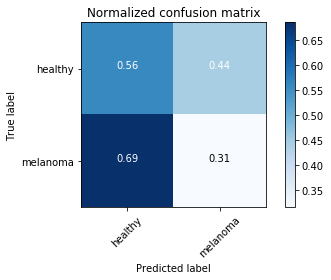

matrice pour 3 composantes principales
Normalized confusion matrix
[[0.63953488 0.36046512]
 [0.62962963 0.37037037]]


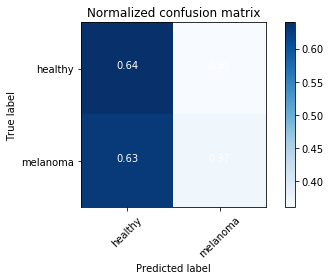

matrice pour 4 composantes principales
Normalized confusion matrix
[[0.68604651 0.31395349]
 [0.5        0.5       ]]


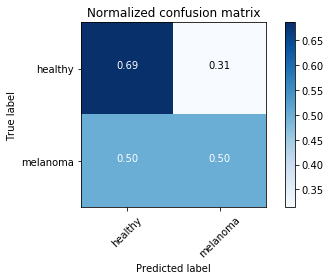

matrice pour 5 composantes principales
Normalized confusion matrix
[[0.68604651 0.31395349]
 [0.57407407 0.42592593]]


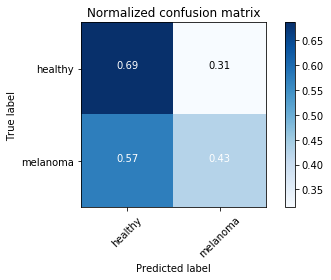

matrice pour 6 composantes principales
Normalized confusion matrix
[[0.72093023 0.27906977]
 [0.61111111 0.38888889]]


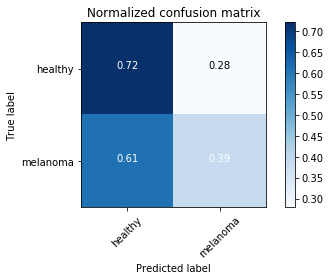

matrice pour 7 composantes principales
Normalized confusion matrix
[[0.58139535 0.41860465]
 [0.66666667 0.33333333]]


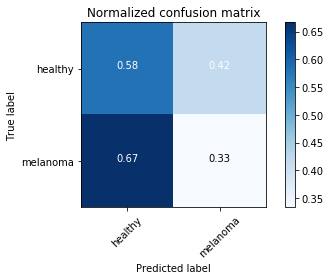

matrice pour 8 composantes principales
Normalized confusion matrix
[[0.62790698 0.37209302]
 [0.55555556 0.44444444]]


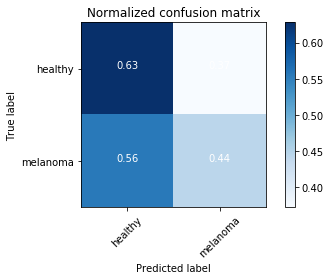

matrice pour 9 composantes principales
Normalized confusion matrix
[[0.69767442 0.30232558]
 [0.57407407 0.42592593]]


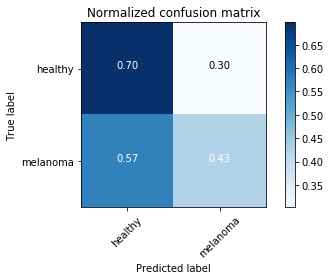

matrice pour 10 composantes principales
Normalized confusion matrix
[[0.59302326 0.40697674]
 [0.68518519 0.31481481]]


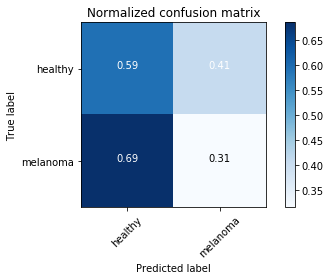

matrice pour 11 composantes principales
Normalized confusion matrix
[[0.56976744 0.43023256]
 [0.7037037  0.2962963 ]]


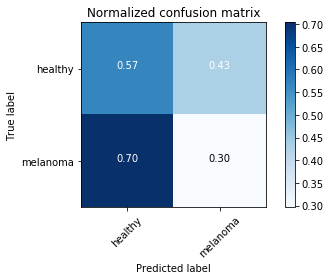

matrice pour 12 composantes principales
Normalized confusion matrix
[[0.55813953 0.44186047]
 [0.55555556 0.44444444]]


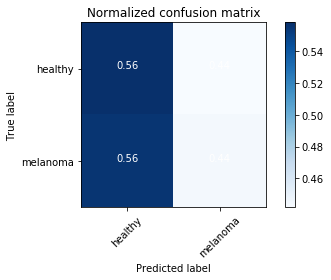

matrice pour 13 composantes principales
Normalized confusion matrix
[[0.55813953 0.44186047]
 [0.62962963 0.37037037]]


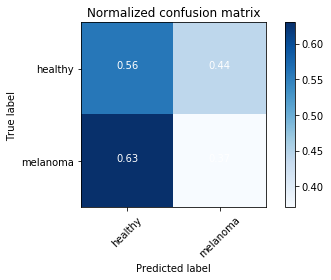

matrice pour 14 composantes principales
Normalized confusion matrix
[[0.56976744 0.43023256]
 [0.59259259 0.40740741]]


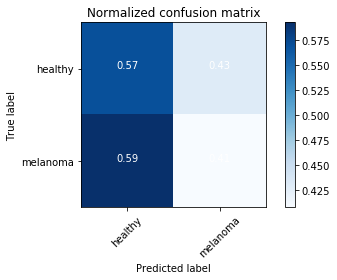

matrice pour 15 composantes principales
Normalized confusion matrix
[[0.56976744 0.43023256]
 [0.66666667 0.33333333]]


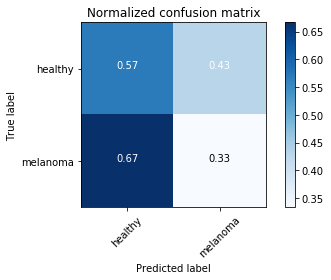

matrice pour 16 composantes principales
Normalized confusion matrix
[[0.68604651 0.31395349]
 [0.64814815 0.35185185]]


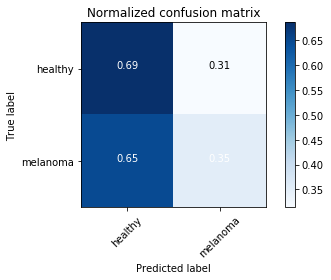

matrice pour 17 composantes principales
Normalized confusion matrix
[[0.65116279 0.34883721]
 [0.64814815 0.35185185]]


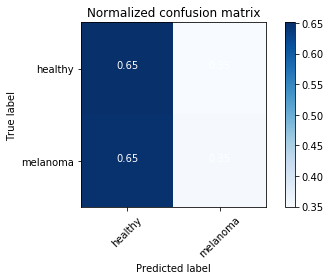

matrice pour 18 composantes principales
Normalized confusion matrix
[[0.54651163 0.45348837]
 [0.7037037  0.2962963 ]]


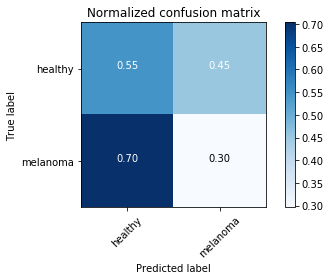

matrice pour 19 composantes principales
Normalized confusion matrix
[[0.65116279 0.34883721]
 [0.64814815 0.35185185]]


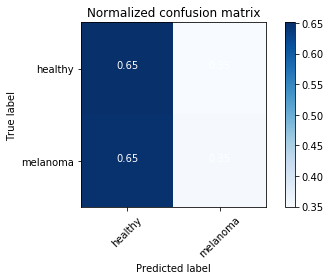

matrice pour 20 composantes principales
Normalized confusion matrix
[[0.6744186  0.3255814 ]
 [0.66666667 0.33333333]]


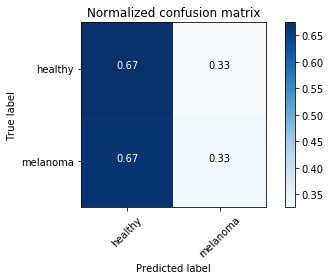

matrice pour 21 composantes principales
Normalized confusion matrix
[[0.6627907 0.3372093]
 [0.7037037 0.2962963]]


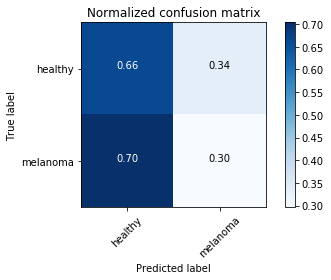

matrice pour 22 composantes principales
Normalized confusion matrix
[[0.6627907 0.3372093]
 [0.7037037 0.2962963]]


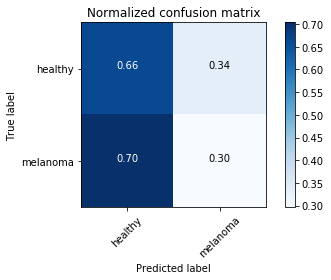

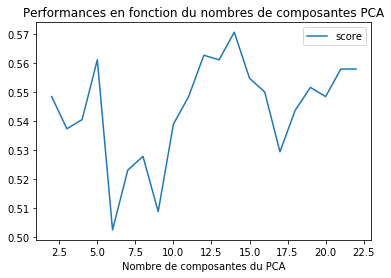

le meilleur score est atteind pour 14 composantes


In [5]:
scores = []

for i in range(2,23) : 
    print('matrice pour '+ str(i) + ' composantes principales')
    #Principal Component analysis
    pca = decomposition.PCA(n_components=i) 
    pca.fit(X_train)
    X_pca = pca.transform(X_train)
    Xtest_pca = pca.transform(X_test)

    # Cross Validation
    parameters = {'min_samples_leaf':[2,70], 'min_samples_split':[2,70]}
    Tree = DecisionTreeClassifier()
    model = GridSearchCV(Tree, parameters, cv=5,scoring = 'accuracy', error_score='raise',iid = True)
    model.fit(X_pca,y_train)
    
    
    scores.append(model.best_score_)
    y_pred = model.predict(Xtest_pca)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
    plt.show()

    
plt.plot(range(2,23),scores, label = 'score')
plt.xlabel('Nombre de composantes du PCA')
plt.title('Performances en fonction du nombres de composantes PCA')
plt.legend()
plt.show()

print('le meilleur score est atteind pour '+str(np.argmax(scores)+2)+' composantes')


C'est finalement la prédiction avec le meilleur score d'accuracy qui a le mieux fonctionné. j'ai obtenu un résultat de 0.06497 pour 9 composantes et de 0.05659 pour 7 composantes. Les résultats sont cependant très variables avec les Decision Trees. Utiliser random Forest ou le bagging permet d'avoir des résultats plus stables.

C'est l'accuracy la plus grande qui semble maximixer le crière de Matthews. 
J'ai remarqué plus tard, que le critère de Matthews était disponible dans la librairie metrics de Sklearn.
Un moyen d'améliorer la prédiction réalisée alors est de l'utiliser.

Si j'avais eu plus de temps pour tester les arbres de décision, j'aurais utilisé le code suivant : 


matrice pour 2 composantes principales
Normalized confusion matrix
[[0.63953488 0.36046512]
 [0.59259259 0.40740741]]


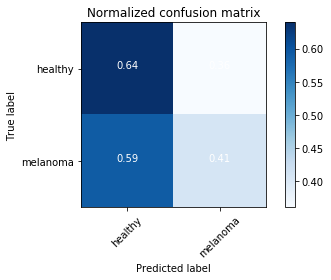

matrice pour 3 composantes principales
Normalized confusion matrix
[[0.63953488 0.36046512]
 [0.57407407 0.42592593]]


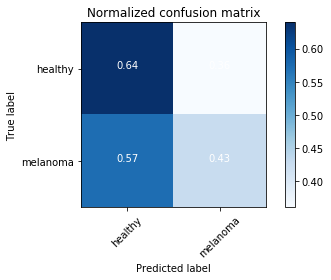

matrice pour 4 composantes principales
Normalized confusion matrix
[[0.54651163 0.45348837]
 [0.64814815 0.35185185]]


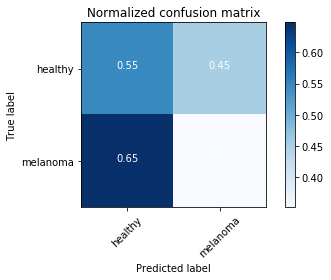

matrice pour 5 composantes principales
Normalized confusion matrix
[[0.45348837 0.54651163]
 [0.62962963 0.37037037]]


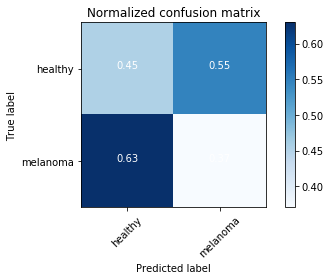

matrice pour 6 composantes principales
Normalized confusion matrix
[[0.37209302 0.62790698]
 [0.42592593 0.57407407]]


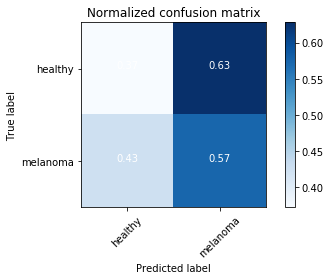

matrice pour 7 composantes principales
Normalized confusion matrix
[[0.69767442 0.30232558]
 [0.59259259 0.40740741]]


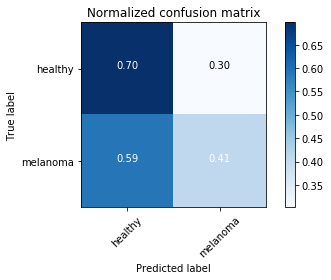

matrice pour 8 composantes principales
Normalized confusion matrix
[[0.6627907  0.3372093 ]
 [0.66666667 0.33333333]]


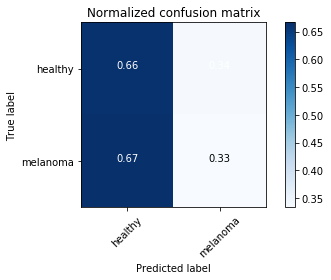

matrice pour 9 composantes principales
Normalized confusion matrix
[[0.62790698 0.37209302]
 [0.57407407 0.42592593]]


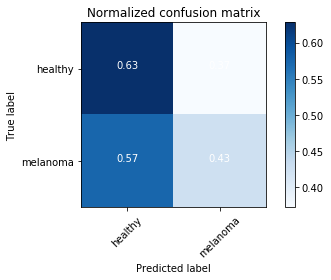

matrice pour 10 composantes principales
Normalized confusion matrix
[[0.55813953 0.44186047]
 [0.64814815 0.35185185]]


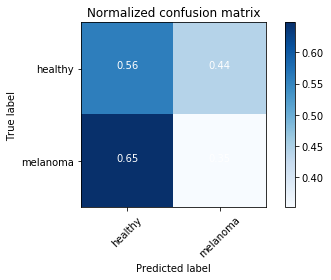

matrice pour 11 composantes principales
Normalized confusion matrix
[[0.59302326 0.40697674]
 [0.55555556 0.44444444]]


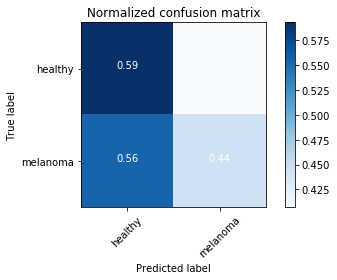

matrice pour 12 composantes principales
Normalized confusion matrix
[[0.59302326 0.40697674]
 [0.55555556 0.44444444]]


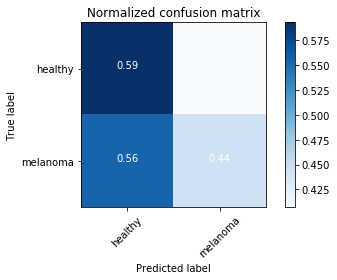

matrice pour 13 composantes principales
Normalized confusion matrix
[[0.70930233 0.29069767]
 [0.62962963 0.37037037]]


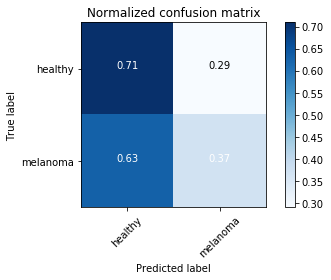

matrice pour 14 composantes principales
Normalized confusion matrix
[[0.6627907  0.3372093 ]
 [0.61111111 0.38888889]]


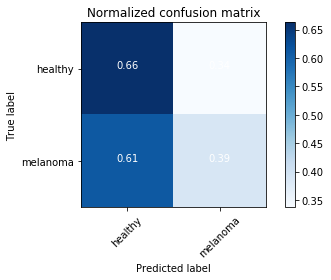

matrice pour 15 composantes principales
Normalized confusion matrix
[[0.6744186  0.3255814 ]
 [0.57407407 0.42592593]]


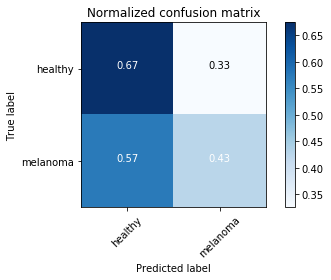

matrice pour 16 composantes principales
Normalized confusion matrix
[[0.61627907 0.38372093]
 [0.61111111 0.38888889]]


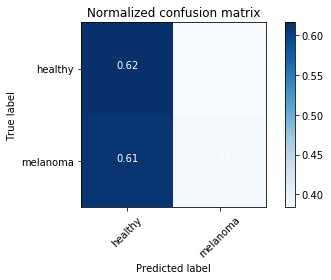

matrice pour 17 composantes principales
Normalized confusion matrix
[[0.54651163 0.45348837]
 [0.55555556 0.44444444]]


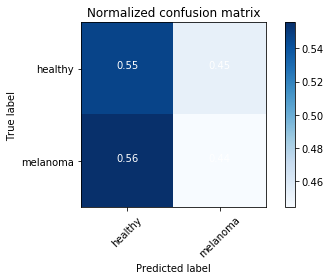

matrice pour 18 composantes principales
Normalized confusion matrix
[[0.55813953 0.44186047]
 [0.55555556 0.44444444]]


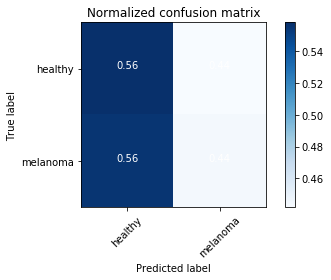

matrice pour 19 composantes principales
Normalized confusion matrix
[[0.55813953 0.44186047]
 [0.55555556 0.44444444]]


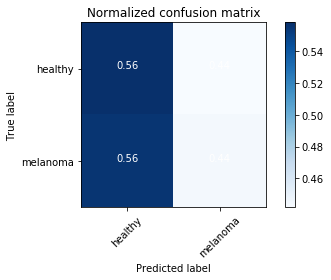

matrice pour 20 composantes principales
Normalized confusion matrix
[[0.52325581 0.47674419]
 [0.44444444 0.55555556]]


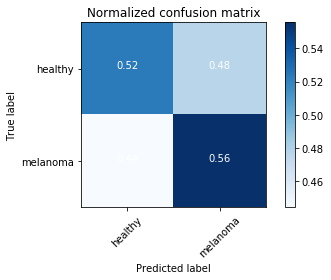

matrice pour 21 composantes principales
Normalized confusion matrix
[[0.52325581 0.47674419]
 [0.53703704 0.46296296]]


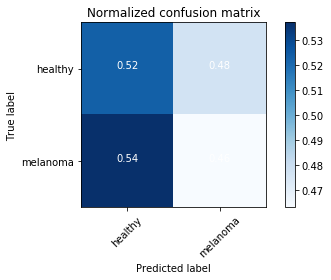

matrice pour 22 composantes principales
Normalized confusion matrix
[[0.56976744 0.43023256]
 [0.62962963 0.37037037]]


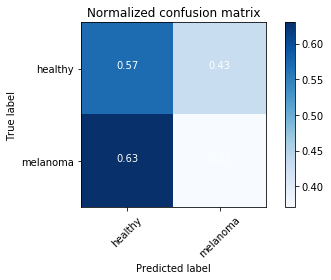

matrice pour 23 composantes principales
Normalized confusion matrix
[[0.54651163 0.45348837]
 [0.61111111 0.38888889]]


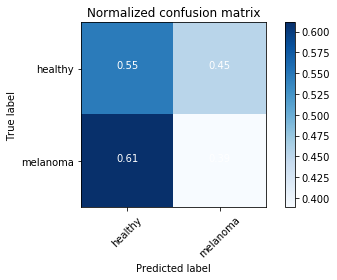

matrice pour 24 composantes principales
Normalized confusion matrix
[[0.58139535 0.41860465]
 [0.61111111 0.38888889]]


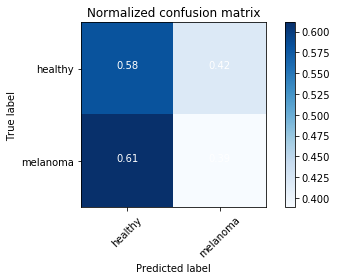

matrice pour 25 composantes principales
Normalized confusion matrix
[[0.59302326 0.40697674]
 [0.62962963 0.37037037]]


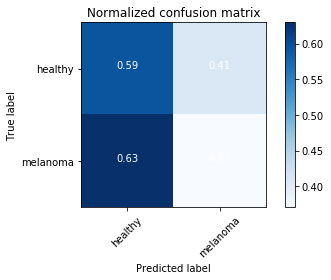

matrice pour 26 composantes principales
Normalized confusion matrix
[[0.59302326 0.40697674]
 [0.66666667 0.33333333]]


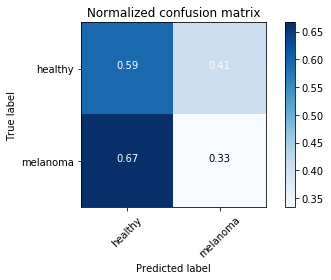

matrice pour 27 composantes principales
Normalized confusion matrix
[[0.59302326 0.40697674]
 [0.64814815 0.35185185]]


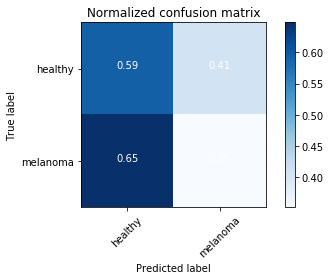

matrice pour 28 composantes principales
Normalized confusion matrix
[[0.55813953 0.44186047]
 [0.66666667 0.33333333]]


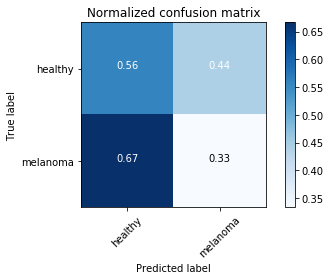

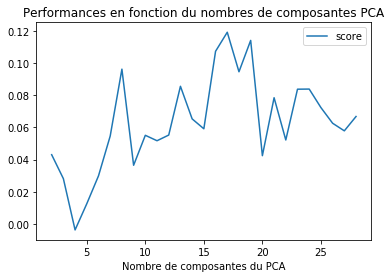

le meilleur score est atteind pour 17 composantes


In [6]:
df = pd.read_csv('data/train.csv')
X_df = df['ImageId']
y_df = df['Malignant']
names = X_df.values
y = y_df.values

df2 = pd.read_csv('data/features.csv')
features_df = df2.loc[df2['ImageId'].isin(list(names))]
features = np.array(features_df.values)
X = features[:,1:] # je prends toutes les features
class_names = ["healthy","melanoma"]
N, M = X.shape

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

from sklearn.preprocessing import StandardScaler

#SCALE 
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

#resample
from imblearn.over_sampling import SMOTE, ADASYN
X_train, y_train = ADASYN().fit_resample(X_train, y_train)


scores = []

for i in range(2,29) : 
    print('matrice pour '+ str(i) + ' composantes principales')
    
    #score de matthews : 
    scorer = make_scorer(matthews_corrcoef)
    
    #Principal Component analysis
    pca = decomposition.PCA(n_components=i) 
    pca.fit(X_train)
    X_pca = pca.transform(X_train)
    Xtest_pca = pca.transform(X_test)

    # Cross Validation
    parameters = {'min_samples_leaf':[2,70], 'min_samples_split':[2,70]}
    Tree = DecisionTreeClassifier()
    model = GridSearchCV(Tree, parameters, cv=5,scoring = scorer, error_score='raise',iid = True)
    model.fit(X_pca,y_train)
    
    
    scores.append(model.best_score_)
    y_pred = model.predict(Xtest_pca)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
    plt.show()

    
plt.plot(range(2,29),scores, label = 'score')
plt.xlabel('Nombre de composantes du PCA')
plt.title('Performances en fonction du nombres de composantes PCA')
plt.legend()
plt.show()

print('le meilleur score est atteind pour '+str(np.argmax(scores)+2)+' composantes')


Encore une fois, le nombre de composantes varie énormément selon les essai. Avec l'un des essai que j'ai réalisé j'ai eu la matrice suivante pour un nombre de composantes de 23 : 
<img src= 'Decision_tree_matrix.jpg'>
On obtient le score suivant : 
<img src= 'Decision_tree_score.jpg'>

Cependant, il semble plus judicieux de se concentrer sur des méthodes qui permettent de réaliser des prédictions plus fiables.

# Random forest essais 11,12

Cette méthode permet de réaliser une prédiction plus précise. Le principe est, à chauqe itération, de tirer aléatoire k éléments parmi n dans les données de test et de réaliser un arbre à partir de ces données.
On crée donc un nouvel arbre à chaque itération, puis on classe les données avec la méthode du vote majoritaire, c'est à dire que c'est le label ayant le plus de voix qui l'emporte. De plus, à cahque noeud, on sélectionne certaines features de manière aléatoire.

De même, j'ai réalisé ces prédictions avec 6 features de moins que ce que je  soumets finalement. De même, j'ai utilisé une cross validation et une principal component analysis afin d'améliorer le résultat. De même, j'ai testé plusieurs paramètres possibles pour la principal Component Analysis avant de choisir les nombres 13 et 19 qui me semblaient les meilleurs. 

Cette fois-ci également c'est 19 qui avait une meilleure accuracy mais pour n= 13 la matrice de confusion présente un plus grand nombre de détection de vrai positifs par rapport au nombre de faux positifs. 
<img src = "Random_forest_matrix.jpg">
<img src = "Random_forest_matrix19.jpg">

In [9]:
#recharger les données avec les features en moins à ce moment là : 
df = pd.read_csv('data/train.csv')
X_df = df['ImageId']
y_df = df['Malignant']
names = X_df.values
y = y_df.values

df2 = pd.read_csv('data/features.csv')
features_df = df2.loc[df2['ImageId'].isin(list(names))]
features = np.array(features_df.values)
X = features[:,1:24] # 6 features ont été ajoutée depuis.
class_names = ["healthy","melanoma"]
N, M = X.shape


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

from sklearn.preprocessing import StandardScaler

#SCALE 
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

#resample
from imblearn.over_sampling import SMOTE, ADASYN
X_train, y_train = ADASYN().fit_resample(X_train, y_train)

2
Best Score: 0.5435816164817749
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 30}
Normalized confusion matrix
[[0.48837209 0.51162791]
 [0.5        0.5       ]]


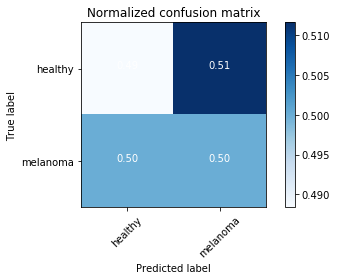

3
Best Score: 0.5229793977812995
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 20}
Normalized confusion matrix
[[0.61627907 0.38372093]
 [0.48148148 0.51851852]]


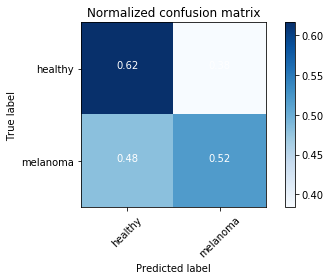

4
Best Score: 0.5213946117274167
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 15}
Normalized confusion matrix
[[0.55813953 0.44186047]
 [0.61111111 0.38888889]]


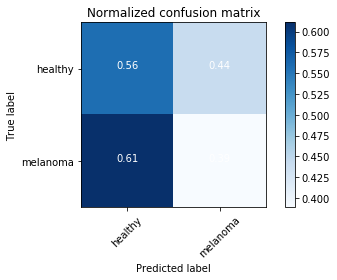

5
Best Score: 0.5356576862123613
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 30}
Normalized confusion matrix
[[0.6744186  0.3255814 ]
 [0.55555556 0.44444444]]


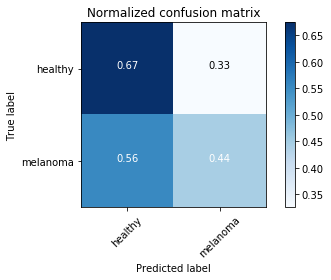

6
Best Score: 0.5562599049128367
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 25}
Normalized confusion matrix
[[0.6744186  0.3255814 ]
 [0.57407407 0.42592593]]


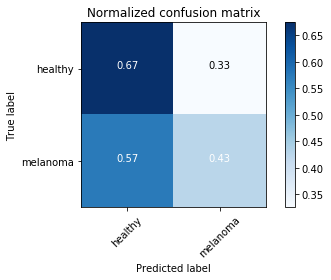

7
Best Score: 0.5467511885895404
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 30}
Normalized confusion matrix
[[0.59302326 0.40697674]
 [0.66666667 0.33333333]]


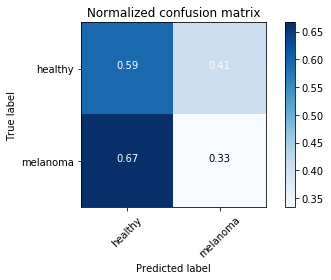

8
Best Score: 0.5594294770206022
Best params: {'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 25}
Normalized confusion matrix
[[0.52325581 0.47674419]
 [0.59259259 0.40740741]]


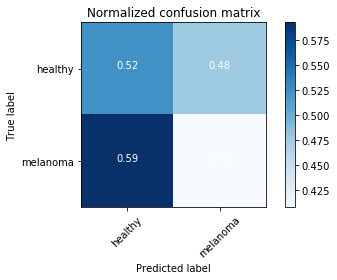

9
Best Score: 0.5594294770206022
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 20}
Normalized confusion matrix
[[0.61627907 0.38372093]
 [0.64814815 0.35185185]]


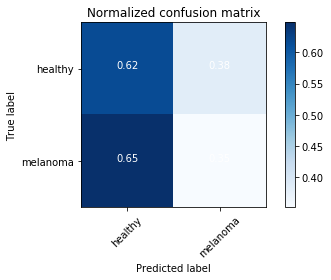

10
Best Score: 0.5499207606973059
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 25}
Normalized confusion matrix
[[0.59302326 0.40697674]
 [0.55555556 0.44444444]]


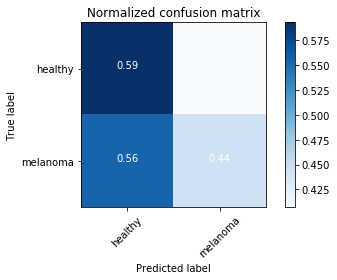

11
Best Score: 0.5499207606973059
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 30}
Normalized confusion matrix
[[0.63953488 0.36046512]
 [0.46296296 0.53703704]]


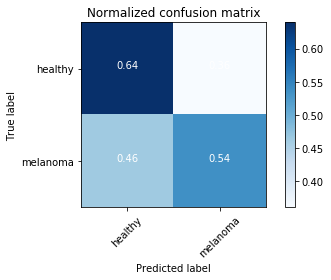

12
Best Score: 0.5388272583201268
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 20}
Normalized confusion matrix
[[0.70930233 0.29069767]
 [0.53703704 0.46296296]]


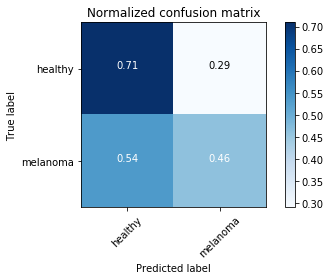

13
Best Score: 0.5594294770206022
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 30}
Normalized confusion matrix
[[0.56976744 0.43023256]
 [0.62962963 0.37037037]]


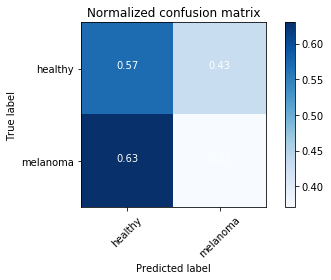

14
Best Score: 0.5657686212361331
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 25}
Normalized confusion matrix
[[0.56976744 0.43023256]
 [0.64814815 0.35185185]]


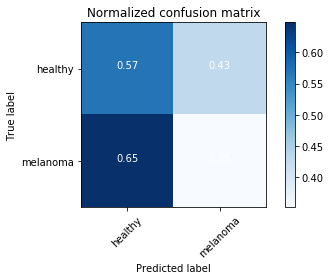

15
Best Score: 0.5673534072900158
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 25}
Normalized confusion matrix
[[0.60465116 0.39534884]
 [0.59259259 0.40740741]]


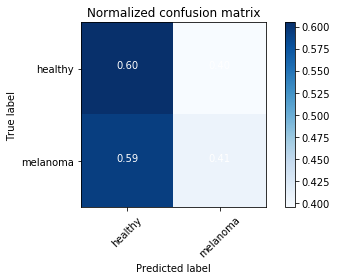

16
Best Score: 0.5705229793977813
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 30}
Normalized confusion matrix
[[0.62790698 0.37209302]
 [0.7037037  0.2962963 ]]


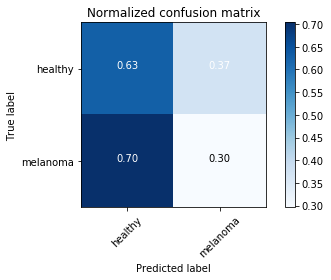

17
Best Score: 0.5705229793977813
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 25}
Normalized confusion matrix
[[0.63953488 0.36046512]
 [0.68518519 0.31481481]]


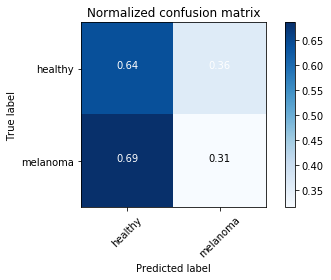

18
Best Score: 0.5736925515055468
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 10}
Normalized confusion matrix
[[0.59302326 0.40697674]
 [0.57407407 0.42592593]]


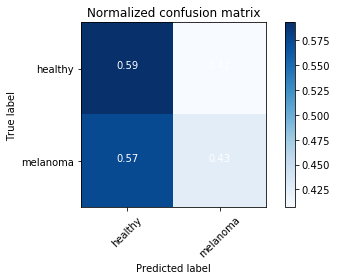

19
Best Score: 0.5879556259904913
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 15}
Normalized confusion matrix
[[0.6627907  0.3372093 ]
 [0.59259259 0.40740741]]


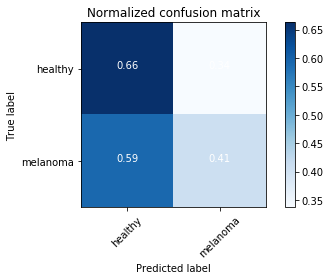

20
Best Score: 0.5768621236133122
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 25}
Normalized confusion matrix
[[0.63953488 0.36046512]
 [0.62962963 0.37037037]]


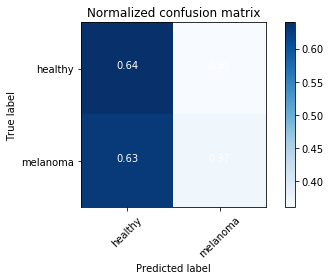

21
Best Score: 0.5927099841521395
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 15}
Normalized confusion matrix
[[0.6627907  0.3372093 ]
 [0.64814815 0.35185185]]


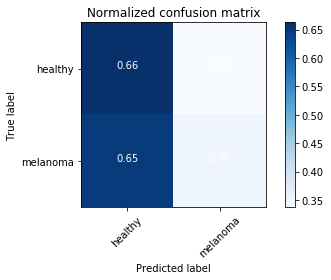

22
Best Score: 0.5736925515055468
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 30}
Normalized confusion matrix
[[0.56976744 0.43023256]
 [0.72222222 0.27777778]]


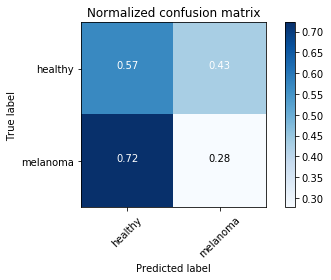

23
Best Score: 0.5911251980982567
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 20}
Normalized confusion matrix
[[0.59302326 0.40697674]
 [0.7037037  0.2962963 ]]


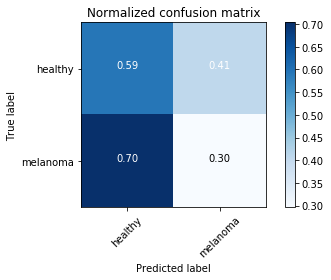

In [10]:
for i in range(2,24) :
    print(i)
    
    pca = decomposition.PCA(n_components=i) # use number of components take explain 90% of variability
    pca.fit(X_train)
    X_pca = pca.transform(X_train)

    Xtest_pca = pca.transform(X_test)


    RF=RandomForestClassifier(criterion="gini", random_state=0)
    p_grid_RF = {'n_estimators': [10,15,20,25,30], 'min_samples_leaf': [2,3,4,5,6], 'max_features': ['sqrt','log2']}   

    grid_RF = GridSearchCV(estimator=RF, param_grid=p_grid_RF, scoring="accuracy", cv=5,iid = True)
    grid_RF.fit(X_pca, y_train)
    print("Best Score: {}".format(grid_RF.best_score_))
    print("Best params: {}".format(grid_RF.best_params_))

    y_pred = grid_RF.predict(Xtest_pca)

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

Cette fois-ci c'est le nombre de composantes égal à 13 qui donnera une meilleure prédiction. Le test du score "accuracy" ni l'utilisation de la matrice me semble très fiables pour permettre un meilleur score. Ils me permettent d'avoir une idée du meilleur résultat, mais dans la partie suivante (SVM), j'utilise le score de Matthews pour réaliser mes prédictions.

De plus les scores obtenus restent assez faibles (0.06  pour le moment avec ces méthodes). En ayant testé l'importance de mes features précédemment, il y a des features qui sont assez faibles. Il est donc possible que le bagging (qui peut, parfois si certaines features sont bien plus importantes que les autres amener à des arbres corrélés), fonctionne bien. 

# Bagging

De même, j'ai souhaité obtenir une meilleure prédiction en testant le meilleur paramètre de principal component analysis.

# Bagging and PCA

2
Best Score (original data) : 0.5136054421768708
Best params (original data) : {'n_estimators': 10}
Bagging score (original data) : 0.5028571428571429
Normalized confusion matrix
[[0.6146789  0.3853211 ]
 [0.68181818 0.31818182]]


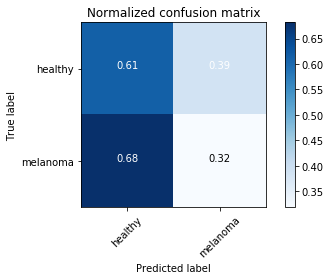

3
Best Score (original data) : 0.5017006802721088
Best params (original data) : {'n_estimators': 10}
Bagging score (original data) : 0.48
Normalized confusion matrix
[[0.53211009 0.46788991]
 [0.60606061 0.39393939]]


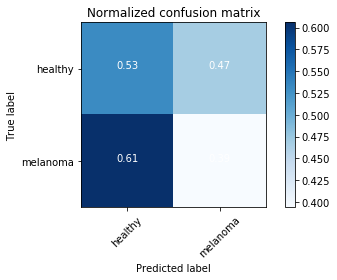

4
Best Score (original data) : 0.49829931972789115
Best params (original data) : {'n_estimators': 5}
Bagging score (original data) : 0.5428571428571428
Normalized confusion matrix
[[0.69724771 0.30275229]
 [0.71212121 0.28787879]]


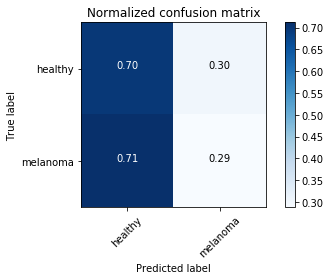

5
Best Score (original data) : 0.5085034013605442
Best params (original data) : {'n_estimators': 10}
Bagging score (original data) : 0.5485714285714286
Normalized confusion matrix
[[0.74311927 0.25688073]
 [0.77272727 0.22727273]]


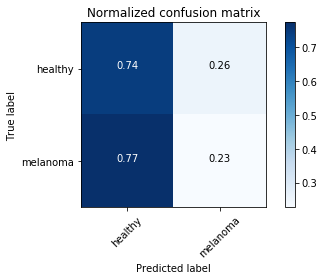

6
Best Score (original data) : 0.5289115646258503
Best params (original data) : {'n_estimators': 5}
Bagging score (original data) : 0.5485714285714286
Normalized confusion matrix
[[0.67889908 0.32110092]
 [0.66666667 0.33333333]]


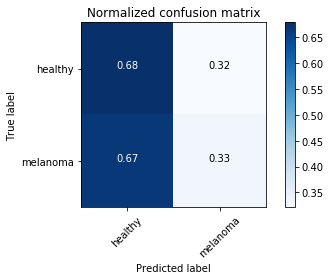

7
Best Score (original data) : 0.5204081632653061
Best params (original data) : {'n_estimators': 5}
Bagging score (original data) : 0.5885714285714285
Normalized confusion matrix
[[0.68807339 0.31192661]
 [0.57575758 0.42424242]]


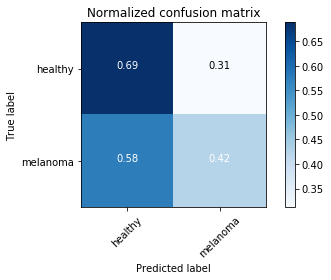

8
Best Score (original data) : 0.5204081632653061
Best params (original data) : {'n_estimators': 5}
Bagging score (original data) : 0.5942857142857143
Normalized confusion matrix
[[0.69724771 0.30275229]
 [0.57575758 0.42424242]]


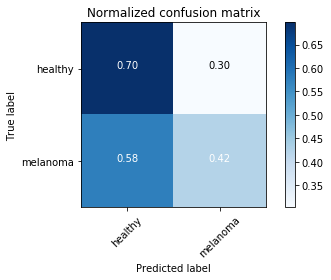

9
Best Score (original data) : 0.5221088435374149
Best params (original data) : {'n_estimators': 10}
Bagging score (original data) : 0.5657142857142857
Normalized confusion matrix
[[0.68807339 0.31192661]
 [0.63636364 0.36363636]]


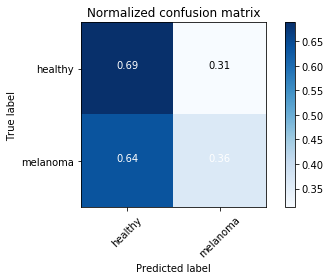

10
Best Score (original data) : 0.5187074829931972
Best params (original data) : {'n_estimators': 5}
Bagging score (original data) : 0.6342857142857142
Normalized confusion matrix
[[0.7706422  0.2293578 ]
 [0.59090909 0.40909091]]


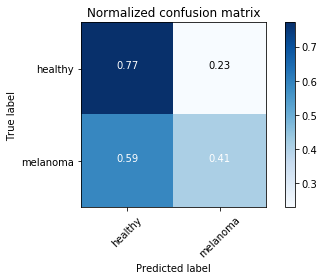

11
Best Score (original data) : 0.5340136054421769
Best params (original data) : {'n_estimators': 5}
Bagging score (original data) : 0.6057142857142858
Normalized confusion matrix
[[0.68807339 0.31192661]
 [0.53030303 0.46969697]]


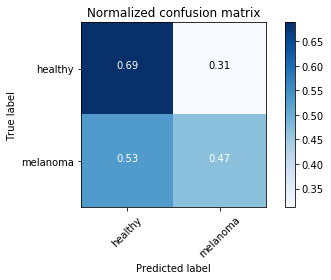

12
Best Score (original data) : 0.5408163265306123
Best params (original data) : {'n_estimators': 5}
Bagging score (original data) : 0.5771428571428572
Normalized confusion matrix
[[0.65137615 0.34862385]
 [0.54545455 0.45454545]]


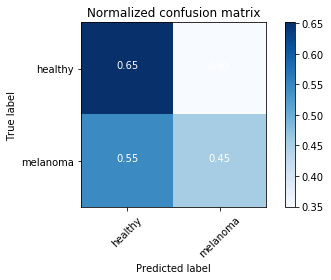

13
Best Score (original data) : 0.5340136054421769
Best params (original data) : {'n_estimators': 5}
Bagging score (original data) : 0.5657142857142857
Normalized confusion matrix
[[0.66972477 0.33027523]
 [0.60606061 0.39393939]]


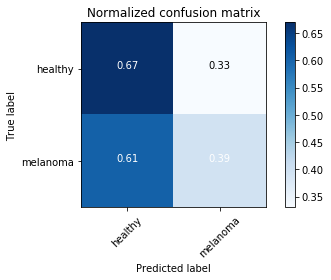

14
Best Score (original data) : 0.5170068027210885
Best params (original data) : {'n_estimators': 5}
Bagging score (original data) : 0.5657142857142857
Normalized confusion matrix
[[0.65137615 0.34862385]
 [0.57575758 0.42424242]]


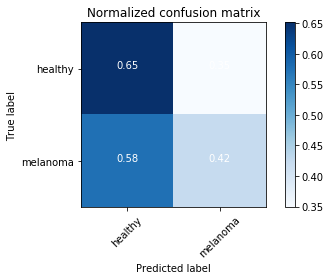

15
Best Score (original data) : 0.532312925170068
Best params (original data) : {'n_estimators': 5}
Bagging score (original data) : 0.5542857142857143
Normalized confusion matrix
[[0.63302752 0.36697248]
 [0.57575758 0.42424242]]


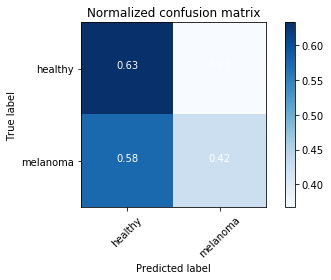

16
Best Score (original data) : 0.5170068027210885
Best params (original data) : {'n_estimators': 5}
Bagging score (original data) : 0.5485714285714286
Normalized confusion matrix
[[0.62385321 0.37614679]
 [0.57575758 0.42424242]]


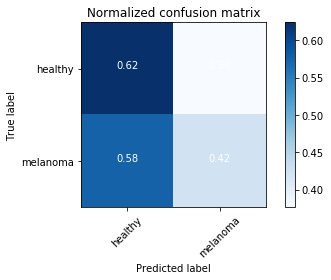

17
Best Score (original data) : 0.5102040816326531
Best params (original data) : {'n_estimators': 5}
Bagging score (original data) : 0.5485714285714286
Normalized confusion matrix
[[0.62385321 0.37614679]
 [0.57575758 0.42424242]]


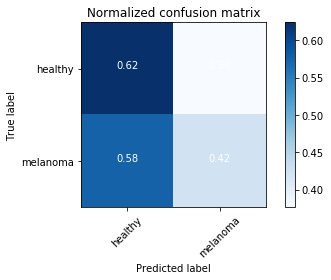

18
Best Score (original data) : 0.5153061224489796
Best params (original data) : {'n_estimators': 10}
Bagging score (original data) : 0.5657142857142857
Normalized confusion matrix
[[0.66972477 0.33027523]
 [0.60606061 0.39393939]]


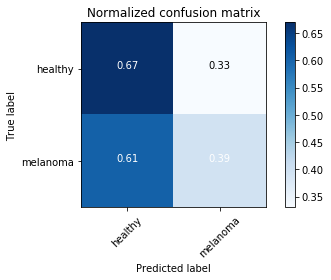

19
Best Score (original data) : 0.5187074829931972
Best params (original data) : {'n_estimators': 5}
Bagging score (original data) : 0.5885714285714285
Normalized confusion matrix
[[0.71559633 0.28440367]
 [0.62121212 0.37878788]]


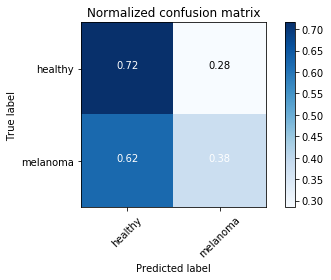

20
Best Score (original data) : 0.5221088435374149
Best params (original data) : {'n_estimators': 10}
Bagging score (original data) : 0.5542857142857143
Normalized confusion matrix
[[0.66055046 0.33944954]
 [0.62121212 0.37878788]]


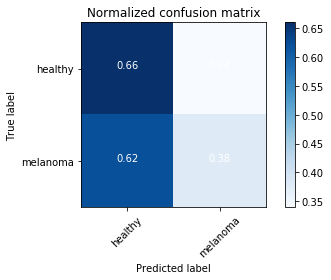

21
Best Score (original data) : 0.5119047619047619
Best params (original data) : {'n_estimators': 10}
Bagging score (original data) : 0.5542857142857143
Normalized confusion matrix
[[0.66055046 0.33944954]
 [0.62121212 0.37878788]]


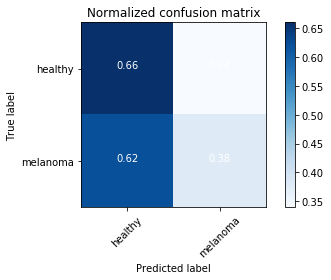

22
Best Score (original data) : 0.5170068027210885
Best params (original data) : {'n_estimators': 10}
Bagging score (original data) : 0.5542857142857143
Normalized confusion matrix
[[0.66055046 0.33944954]
 [0.62121212 0.37878788]]


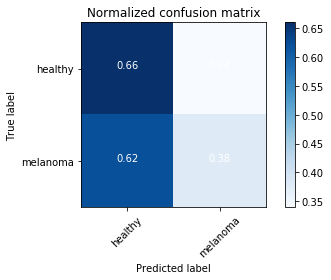

23
Best Score (original data) : 0.5170068027210885
Best params (original data) : {'n_estimators': 10}
Bagging score (original data) : 0.5542857142857143
Normalized confusion matrix
[[0.66055046 0.33944954]
 [0.62121212 0.37878788]]


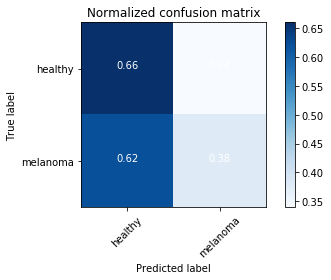

4


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=0.25, random_state=0)

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

#resample
from imblearn.over_sampling import SMOTE, ADASYN
X_train, y_train = ADASYN().fit_resample(X_train, y_train)

confusion_scores = []



for k in range(2,24) :
    print(k)

    # PCA
    pca = decomposition.PCA(n_components=k)
    pca.fit(X_train)
    X_pca = pca.transform(X_train)

    Xtest_pca = pca.transform(X_test)
    Tree = DecisionTreeClassifier()
    model = GridSearchCV(Tree, parameters, cv=5,scoring = 'accuracy',error_score='raise',iid = True)
    model.fit(X,y)
    best_params = model.best_params_
    parameters = {'min_samples_leaf':[2,70], 'min_samples_split':[2,70]}
    Tree = DecisionTreeClassifier(criterion="gini",min_samples_leaf=best_params["min_samples_leaf"],min_samples_split=best_params["min_samples_split"], random_state=0)
    
    
    
    
    
    p_grid_bagging = {'n_estimators': [5,10,15,20]}      
    bag=BaggingClassifier(base_estimator=Tree, random_state=0)
    grid_bagging = GridSearchCV(estimator=bag, param_grid=p_grid_bagging, scoring="accuracy", cv=5,iid = True)
    grid_bagging.fit(X_pca, y_train)
    print("Best Score (original data) : {}".format(grid_bagging.best_score_))
    print("Best params (original data) : {}".format(grid_bagging.best_params_))
    print("Bagging score (original data) :",grid_bagging.score(Xtest_pca,y_test))


    y_pred = grid_bagging.predict(Xtest_pca)

    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
    plt.show()
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   
    score = cm[1][0]-cm[0][0]+cm[1][1]-cm[0][1]
    confusion_scores.append(score)
    
print(np.argmin(confusion_scores))
    
   

Le meilleur score, qui correspond également à une matrice de confusion satisfaisante est atteind pour 11 composantes. L'accuracy est moins élevée que pour les random forest et la matrice de confusion ne semble pas particulièrement meilleure que dans le cas de random forest. 
<img src='Bagging_matrix.jpg'>
Cependant le score de Mathews est bien meilleur (0,1)
Pourtant, nous avons évité le biais lié au fait que les grains de beauté cancéreux sont moins bien représentés, ce qui est confirmé par la matrice de confusion. 


# Conclusion :  méthodes ensemblistes 

La méthode de décision tree donne un mauvais résultat, probablement car cette méthode est assez instable. On a tenté de l'améliorer en utilisant Random Forest et le Bagging, avec un succès assez limité. Je vois une explication possible à ce mauvais résultat : ces méthodes ont tendance à overfitter l'ensemble d'entrainement, et sont donc assez sensibles au bruit, et donc assez mauvaises pour la prédictions d'ensembles qui ont une grande variabilité. Or les critères qui permettent de déterminer la dangerosité d'un grain de beauté sont nombreux et donc la variance au sein de l'ensemble des mélanomes me semble assez élevée, ce qui pourrait être une explication de la mauvaise performance de ces méthodes. 

# Appendice : code permettant d'obtenir les CSV : 

## Loading data

In [12]:
#train set :
df = pd.read_csv('data/train.csv')
X_df = df['ImageId']
y_df = df['Malignant']
names = X_df.values
y_train = y_df.values

df2 = pd.read_csv('data/features.csv')
features_df = df2.loc[df2['ImageId'].isin(list(names))]
features = np.array(features_df.values)
X_train = features[:,1:24] # 6 features ont été ajoutée depuis.
#test set : 
df = pd.read_csv('data/test.csv')
X_df = df['ImageId']
y_df = df['Malignant']
names = X_df.values
y = y_df.values

df2 = pd.read_csv('data/features.csv')
features_df = df2.loc[df2['ImageId'].isin(list(names))]
features = np.array(features_df.values)
X_test = features[:,1:24] # 6 features ont été ajoutée depuis.

In [13]:
#scale data
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

#resample
from imblearn.over_sampling import SMOTE, ADASYN
X_train, y_train = ADASYN().fit_resample(X_train, y_train)

## Decision Trees

In [14]:
pca = decomposition.PCA(n_components=9) # n_components = 7 ou 9 
pca.fit(X_train)
X_pca = pca.transform(X_train)
Xtest_pca = pca.transform(X_test)

# Cross Validation
parameters = {'min_samples_leaf':[2,70], 'min_samples_split':[2,70]}
Tree = DecisionTreeClassifier()
model = GridSearchCV(Tree, parameters, cv=5,scoring = 'accuracy', error_score='raise',iid = True)
model.fit(X_pca,y_train)
    
y_pred = model.predict(Xtest_pca)

In [15]:
df_submission = pd.read_csv('data/test.csv')
i = 0
for Id in df_submission['ImageId']:
    if Id != names[i] : 
        print('mismatch')
    value = y_pred[i] # Draw a random number between 0 and 1 : binary classification : put here the result of
    i = i+1                # your classifier
    df_submission.loc[df_submission['ImageId'] == Id, 'Malignant'] = value
df_submission['Malignant'] = df_submission['Malignant'].astype(int) # This line is mandatory to be sure to have integer
print(df_submission.head(3))
df_submission.to_csv('data/essai9.csv', index=None, sep=',', mode='w') # Save the data in the exemple_test.csv file

     ImageId  Malignant
0  IM_000788          1
1  IM_000640          1
2  IM_000889          0


## Random Forest

In [16]:
pca = decomposition.PCA(n_components=13) #essai effectués avec 13 et 19
pca.fit(X_train)
X_pca = pca.transform(X_train)
Xtest_pca = pca.transform(X_test)


RF=RandomForestClassifier(criterion="gini", random_state=0)
p_grid_RF = {'n_estimators': [10,15,20,25,30], 'min_samples_leaf': [2,3,4,5,6], 'max_features': ['sqrt','log2']}   

grid_RF = GridSearchCV(estimator=RF, param_grid=p_grid_RF, scoring="accuracy", cv=5,iid = True)
grid_RF.fit(X_pca, y_train)


y_pred = grid_RF.predict(Xtest_pca)

In [17]:
df_submission = pd.read_csv('data/test.csv')
i = 0
for Id in df_submission['ImageId']:
    if Id != names[i] : 
        print('mismatch')
    value = y_pred[i] # Draw a random number between 0 and 1 : binary classification : put here the result of
    i = i+1                # your classifier
    df_submission.loc[df_submission['ImageId'] == Id, 'Malignant'] = value
df_submission['Malignant'] = df_submission['Malignant'].astype(int) # This line is mandatory to be sure to have integer
print(df_submission.head(3))
df_submission.to_csv('data/essai9.csv', index=None, sep=',', mode='w') # Save the data in the exemple_test.csv file

     ImageId  Malignant
0  IM_000788          1
1  IM_000640          1
2  IM_000889          0


## Bagging

In [18]:
pca = decomposition.PCA(n_components=11) #ou 3 si on prend moins de features
pca.fit(X_train)
X_pca = pca.transform(X_train)

Xtest_pca = pca.transform(X_test)

Tree = DecisionTreeClassifier(criterion="gini",min_samples_leaf=best_params["min_samples_leaf"],min_samples_split=best_params["min_samples_split"], random_state=0)

p_grid_bagging = {'n_estimators': [5,10,15,20]}      
bag=BaggingClassifier(base_estimator=Tree, random_state=0)
grid_bagging = GridSearchCV(estimator=bag, param_grid=p_grid_bagging, scoring="accuracy", cv=5,iid = True)
grid_bagging.fit(X_pca, y_train)

y_pred = grid_bagging.predict(Xtest_pca)


In [19]:
df_submission = pd.read_csv('data/test.csv')

In [20]:
i = 0
for Id in df_submission['ImageId']:
    if Id != names[i] : 
        print('mismatch')
    value = y_pred[i] # Draw a random number between 0 and 1 : binary classification : put here the result of
    i = i+1                # your classifier
    df_submission.loc[df_submission['ImageId'] == Id, 'Malignant'] = value
df_submission['Malignant'] = df_submission['Malignant'].astype(int) # This line is mandatory to be sure to have integer
print(df_submission.head(3))
df_submission.to_csv('data/ESSAI13.csv', index=None, sep=',', mode='w') # Save the data in the exemple_test.csv file

     ImageId  Malignant
0  IM_000788          0
1  IM_000640          1
2  IM_000889          1


# Random Forest avec moins de features.

In [21]:
#train set :
df = pd.read_csv('data/train.csv')
X_df = df['ImageId']
y_df = df['Malignant']
names = X_df.values
y_train = y_df.values

df2 = pd.read_csv('data/features.csv')
features_df = df2.loc[df2['ImageId'].isin(list(names))]
features_df = features_df[['0','1','2','3','4','5','6','24','25','26','27']]
features = np.array(features_df.values)
X_train = features # 6 features ont été ajoutée depuis.
#test set : 
df = pd.read_csv('data/test.csv')
X_df = df['ImageId']
y_df = df['Malignant']
names = X_df.values
y = y_df.values

df2 = pd.read_csv('data/features.csv')
features_df = df2.loc[df2['ImageId'].isin(list(names))]
features_df = features_df[['0','1','2','3','4','5','6','24','25','26','27']]
features = np.array(features_df.values)
X_test = features # 6 features ont été ajoutée depuis.

In [22]:
#scale data
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

#resample
from imblearn.over_sampling import SMOTE, ADASYN
X_train, y_train = ADASYN().fit_resample(X_train, y_train)

In [23]:
pca = decomposition.PCA(n_components=5) #essai effectués avec 13 et 19
pca.fit(X_train)
X_pca = pca.transform(X_train)
Xtest_pca = pca.transform(X_test)


RF=RandomForestClassifier(criterion="gini", random_state=0)
p_grid_RF = {'n_estimators': [10,15,20,25,30], 'min_samples_leaf': [2,3,4,5,6], 'max_features': ['sqrt','log2']}   

grid_RF = GridSearchCV(estimator=RF, param_grid=p_grid_RF, scoring="accuracy", cv=5,iid = True)
grid_RF.fit(X_pca, y_train)


y_pred = grid_RF.predict(Xtest_pca)

In [24]:
df_submission = pd.read_csv('data/test.csv')
i = 0
for Id in df_submission['ImageId']:
    if Id != names[i] : 
        print('mismatch')
    value = y_pred[i] # Draw a random number between 0 and 1 : binary classification : put here the result of
    i = i+1                # your classifier
    df_submission.loc[df_submission['ImageId'] == Id, 'Malignant'] = value
df_submission['Malignant'] = df_submission['Malignant'].astype(int) # This line is mandatory to be sure to have integer
print(df_submission.head(3))
df_submission.to_csv('data/essai9.csv', index=None, sep=',', mode='w') # Save the data in the exemple_test.csv file

     ImageId  Malignant
0  IM_000788          1
1  IM_000640          1
2  IM_000889          0


# Bagging avec moins de features

In [25]:
#train set :
df = pd.read_csv('data/train.csv')
X_df = df['ImageId']
y_df = df['Malignant']
names = X_df.values
y_train = y_df.values

df2 = pd.read_csv('data/features.csv')
features_df = df2.loc[df2['ImageId'].isin(list(names))]
features_df = features_df[['0','1','2','3','4','5','6','24','25','26','27']]
features = np.array(features_df.values)
X_train = features # 6 features ont été ajoutée depuis.
#test set : 
df = pd.read_csv('data/test.csv')
X_df = df['ImageId']
y_df = df['Malignant']
names = X_df.values
y = y_df.values

df2 = pd.read_csv('data/features.csv')
features_df = df2.loc[df2['ImageId'].isin(list(names))]
features_df = features_df[['0','1','2','3','4','5','6','24','25','26','27']]
features = np.array(features_df.values)
X_test = features # 6 features ont été ajoutée depuis.

In [26]:
#scale data
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

#resample
from imblearn.over_sampling import SMOTE, ADASYN
X_train, y_train = ADASYN().fit_resample(X_train, y_train)

In [27]:
pca = decomposition.PCA(n_components=11) #ou 3 si on prend moins de features
pca.fit(X_train)
X_pca = pca.transform(X_train)

Xtest_pca = pca.transform(X_test)

Tree = DecisionTreeClassifier(criterion="gini",min_samples_leaf=best_params["min_samples_leaf"],min_samples_split=best_params["min_samples_split"], random_state=0)

p_grid_bagging = {'n_estimators': [5,10,15,20]}      
bag=BaggingClassifier(base_estimator=Tree, random_state=0)
grid_bagging = GridSearchCV(estimator=bag, param_grid=p_grid_bagging, scoring="accuracy", cv=5,iid = True)
grid_bagging.fit(X_pca, y_train)

y_pred = grid_bagging.predict(Xtest_pca)


In [28]:
df_submission = pd.read_csv('data/test.csv')
i = 0
for Id in df_submission['ImageId']:
    if Id != names[i] : 
        print('mismatch')
    value = y_pred[i] # Draw a random number between 0 and 1 : binary classification : put here the result of
    i = i+1                # your classifier
    df_submission.loc[df_submission['ImageId'] == Id, 'Malignant'] = value
df_submission['Malignant'] = df_submission['Malignant'].astype(int) # This line is mandatory to be sure to have integer
print(df_submission.head(3))
df_submission.to_csv('data/essai9.csv', index=None, sep=',', mode='w') # Save the data in the exemple_test.csv file

     ImageId  Malignant
0  IM_000788          1
1  IM_000640          0
2  IM_000889          1
